📂 Upload your CSV file:


Saving MultipleLR.csv - MultipleLR.csv (1).csv to MultipleLR.csv - MultipleLR.csv (1) (1).csv

Loaded dataset 'MultipleLR.csv - MultipleLR.csv (1) (1).csv' with shape (24, 4)


,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101



 Starting training...
Epoch 1/200 - MSE: 9831.447740
Epoch 21/200 - MSE: 6.361927
Epoch 41/200 - MSE: 6.022198
Epoch 61/200 - MSE: 6.004587
Epoch 81/200 - MSE: 5.965113
Epoch 101/200 - MSE: 6.013607
Epoch 121/200 - MSE: 5.970081
Epoch 141/200 - MSE: 5.964653
Epoch 161/200 - MSE: 6.069781
Epoch 181/200 - MSE: 6.066323
Epoch 200/200 - MSE: 6.050057

 Training complete.
Final MSE: 6.050057
R² score: 0.989455
Intercept: 162.442454
Coefficients: [ 4.09271297  6.84232574 13.52288053]


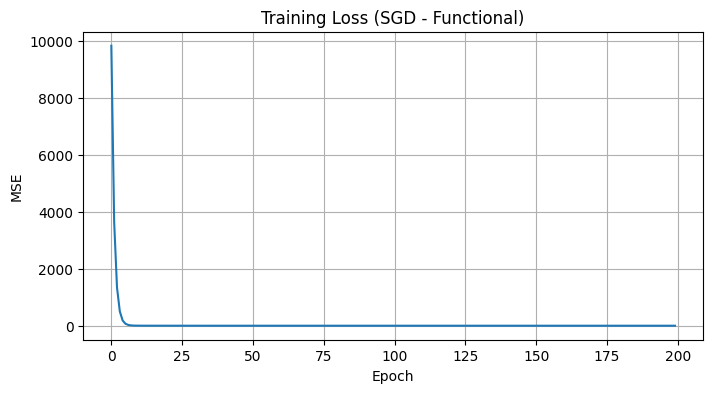

,Actual,Predicted
0,185.0,184.726247
1,180.0,181.556722
2,196.0,199.302919
3,142.0,139.374542
4,101.0,104.373405
5,149.0,150.511336
6,115.0,113.620553
7,175.0,174.319692
8,164.0,164.400036
9,141.0,143.694322


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Upload dataset ---
print("📂 Upload your CSV file:")
uploaded = files.upload()

if not uploaded:
    print("No file uploaded. Please upload a CSV file.")
else:
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)
    print(f"\nLoaded dataset '{filename}' with shape {df.shape}")
    display(df.head())

    # --- Step 2: Choose target column ---
    target_col = df.columns[-1]   # assume last column is target
    X = df.drop(columns=[target_col]).values.astype(float)
    y = df[target_col].values.astype(float).reshape(-1, 1)

    # --- Step 3: Normalize features ---
    X_mean = X.mean(axis=0, keepdims=True)
    X_std = X.std(axis=0, keepdims=True)
    X_std[X_std == 0] = 1.0  # prevent divide by zero
    X_scaled = (X - X_mean) / X_std

    # --- Step 4: Define Separate Functions for SGD ---

    def predict_linear_regression(X, w, b):
        """
        Computes predictions y = Xw + b.
        """
        return X @ w + b

    def train_linear_regression_sgd(X, y, lr=0.01, epochs=200, batch_size=1, shuffle=True, random_state=42, verbose=True):
        """
        Trains Linear Regression using Stochastic Gradient Descent.
        Returns: weights (w), bias (b), loss_history
        """
        np.random.seed(random_state)
        n_samples, n_features = X.shape

        # Initialize parameters
        w = np.zeros((n_features, 1))
        b = 0.0

        loss_history = []
        indices = np.arange(n_samples)

        for epoch in range(epochs):
            if shuffle:
                np.random.shuffle(indices)

            # Mini-batch loop
            for start in range(0, n_samples, batch_size):
                batch_idx = indices[start:start+batch_size]
                Xb = X[batch_idx]
                yb = y[batch_idx]

                # Forward pass using the predict function
                preds = predict_linear_regression(Xb, w, b)
                error = preds - yb

                # Compute Gradients
                grad_w = (2 / len(Xb)) * (Xb.T @ error)
                grad_b = (2 / len(Xb)) * np.sum(error)

                # Update Parameters
                w -= lr * grad_w
                b -= lr * grad_b

            # Compute full MSE for monitoring
            current_preds = predict_linear_regression(X, w, b)
            loss = np.mean((current_preds - y) ** 2)
            loss_history.append(loss)

            if verbose and (epoch % max(1, epochs // 10) == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch+1}/{epochs} - MSE: {loss:.6f}")

        return w, b, loss_history

    # --- Step 5: Train model using functions ---
    print("\n Starting training...")
    w_final, b_final, loss_history = train_linear_regression_sgd(X_scaled, y, lr=0.01, epochs=200)

    # --- Step 6: Evaluate model ---
    y_pred = predict_linear_regression(X_scaled, w_final, b_final)

    mse = np.mean((y_pred - y) ** 2)
    r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

    print("\n Training complete.")
    print(f"Final MSE: {mse:.6f}")
    print(f"R² score: {r2:.6f}")
    print(f"Intercept: {float(b_final):.6f}")
    print("Coefficients:", w_final.ravel())

    # --- Step 7: Plot loss ---
    plt.figure(figsize=(8,4))
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Training Loss (SGD - Functional)")
    plt.grid(True)
    plt.show()

    # --- Step 8: Compare first few predictions ---
    compare_df = pd.DataFrame({
        "Actual": y.ravel(),
        "Predicted": y_pred.ravel()
    })
    display(compare_df.head(10))